# Performing image classification through CNN

In [70]:
import tensorflow as tf

In [71]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
cifar10 = tf.keras.datasets.cifar10

In [74]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_val , y_train, y_val =  train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [77]:
print("x_val.shape", x_val.shape)
print("y_val.shape", y_val.shape)

x_val.shape (10000, 32, 32, 3)
y_val.shape (10000,)


In [78]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [79]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Flatten()(x)

x = Dense(1024, activation='relu')(x)

x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [80]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)

Epoch 1/10
1250/1250 [==============================] - 36s 28ms/step - loss: 1.5059 - accuracy: 0.4541 - val_loss: 1.2743 - val_accuracy: 0.5392
Epoch 2/10
1250/1250 [==============================] - 34s 28ms/step - loss: 1.1664 - accuracy: 0.5822 - val_loss: 1.1152 - val_accuracy: 0.6024
Epoch 3/10
1250/1250 [==============================] - 34s 27ms/step - loss: 0.9843 - accuracy: 0.6517 - val_loss: 1.0974 - val_accuracy: 0.6182
Epoch 4/10
1250/1250 [==============================] - 34s 27ms/step - loss: 0.8258 - accuracy: 0.7081 - val_loss: 0.9902 - val_accuracy: 0.6573
Epoch 5/10
1250/1250 [==============================] - 34s 27ms/step - loss: 0.6702 - accuracy: 0.7627 - val_loss: 1.0111 - val_accuracy: 0.6645
Epoch 6/10
1250/1250 [==============================] - 34s 27ms/step - loss: 0.5120 - accuracy: 0.8212 - val_loss: 1.0857 - val_accuracy: 0.6573
Epoch 7/10
1250/1250 [==============================] - 34s 27ms/step - loss: 0.3723 - accuracy: 0.8700 - val_loss: 1.2688 -

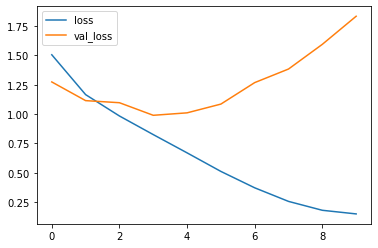

In [81]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

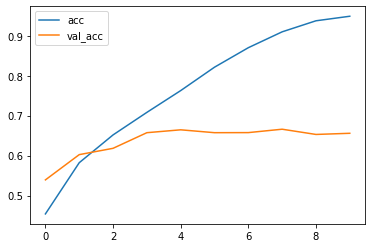

In [82]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [83]:
labels = '''airplane
            automobile
            bird
            cat
            deer
            dog
            frog
            horse
            ship
            truck'''.split()

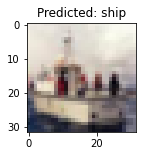

In [87]:

selected = 88


res = model.predict(x_test[selected:selected+1])

arr = np.array(res[0])
result = np.where(arr == np.amax(arr))

plt.figure(figsize=(12,2))
plt.imshow(x_test[selected], cmap='gray')

plt.title("Predicted: %s" % (labels[int(result[0])]));